In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

from filter_functions import *

from ml_models.pocketpla import PocketPLA
from ml_models.linear_regression import LinearRegression
from ml_models.logistic_regression import LogisticRegression


%matplotlib inline


test_filename = '../data/redu_test.csv'
train_filename = '../data/redu_train.csv'


# Classificando os digitos 1 e 5

In [2]:
def PrintPlot(x, y, w):
    plt.scatter(x[:, 0], x[:, 1], c=list(np.sign(y).ravel()) )
    x = np.linspace(-1, 250, 1000)


    size = 250
    plt.ylim(-50, size)


    plt.plot(x, (-w[0] - w[1]*x) / w[2], color='darkred')

In [3]:
directory = '../data/filtered_digit_dataset/'
filename_x_test = '1x5_x_test.txt'
filename_y_test = '1x5_y_test.txt'

filename_x_train = '1x5_x_train.txt'
filename_y_train = '1x5_y_train.txt'

size_train = 500
size_test = 250

x_test_1x5 = np.loadtxt(directory + filename_x_test, dtype = float)
y_test_1x5 = np.loadtxt(directory + filename_y_test, dtype = int)

x_test_1x5 = x_test_1x5[:size_test]
y_test_1x5 = y_test_1x5[:size_test]


x_train_1x5 = np.loadtxt(directory + filename_x_train, dtype = float)
y_train_1x5 = np.loadtxt(directory + filename_y_train, dtype = int)

x_train_1x5 = x_train_1x5[:size_train]
y_train_1x5 = y_train_1x5[:size_train]


### Pocket PLA

In [4]:
clf = PocketPLA()
clf.fit(x_train_1x5, y_train_1x5, max_iter=100)
predict_y = clf.predict(x_test_1x5)
w = clf.get_w()


In [5]:
w

array([2985.        ,  -25.85882353,  -18.94117647])

In [6]:
clf.score(x_test_1x5, y_test_1x5)

0.852

In [7]:
predict_y = clf.predict(x_test_1x5)


In [8]:
print(classification_report(y_test_1x5, predict_y))
print(confusion_matrix(y_test_1x5, predict_y))

              precision    recall  f1-score   support

          -1       0.89      0.80      0.84       122
           1       0.82      0.91      0.86       128

    accuracy                           0.85       250
   macro avg       0.86      0.85      0.85       250
weighted avg       0.86      0.85      0.85       250

[[ 97  25]
 [ 12 116]]


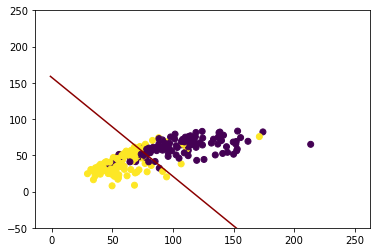

In [9]:
PrintPlot(x_test_1x5, y_test_1x5, w)

### Regressão Linear

In [10]:
clf = LinearRegression()
clf.fit(x_train_1x5, y_train_1x5)
predict_y = clf.predict(x_test_1x5)
w = clf.get_w()

In [11]:
w

array([ 1.97705491, -0.01544544, -0.01533181])

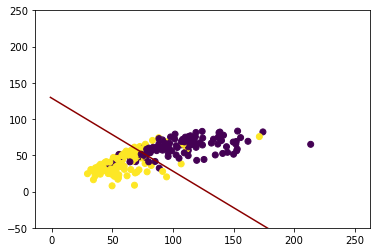

In [12]:
PrintPlot(x_test_1x5, y_test_1x5, w)

### Regressão Logistica

In [13]:
clf = LogisticRegression(tmax=50000, batch_size=32)
clf.fit(x_train_1x5, y_train_1x5)
predict_y = clf.predict(x_test_1x5)
predict_y_prob = clf.predict_prob(x_test_1x5)


w = clf.get_w()

In [14]:
print(classification_report(y_test_1x5, predict_y))
print(confusion_matrix(y_test_1x5, predict_y))

              precision    recall  f1-score   support

          -1       0.83      0.04      0.08       122
           1       0.52      0.99      0.68       128

    accuracy                           0.53       250
   macro avg       0.68      0.52      0.38       250
weighted avg       0.67      0.53      0.39       250

[[  5 117]
 [  1 127]]


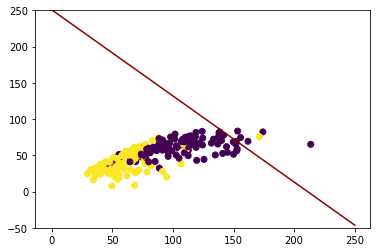

In [15]:
PrintPlot(x_test_1x5, y_test_1x5, w)

# Classificando os digitos 0, 1 e 9

In [16]:
test = pd.read_csv(test_filename)
train = pd.read_csv(train_filename)

size_train = 500
size_test = 250

W_ = []


In [17]:
values1 = [1, 8]

principal = values1[0]

filtered_test_A = filter_label(test, values1)
filtered_test_A = filtered_test_A[:size_test]

filtered_train_A = filter_label(train, values1)
filtered_train_A = filtered_train_A[:size_train]


x_test_A, y_test_A = generate_x_y(filtered_test_A, principal_label=principal)
x_train_A, y_train_A = generate_x_y(filtered_train_A, principal_label=principal)

In [18]:
values2 = [8, 4]

principal = values2[0]


filtered_test_B = filter_label(test, values2)
filtered_test_B = filtered_test_B[:size_test]


filtered_train_B = filter_label(train, values2)
filtered_train_B = filtered_train_B[:size_train]

x_test_B, y_test_B = generate_x_y(filtered_test_B, principal_label=principal)
x_train_B, y_train_B = generate_x_y(filtered_train_B, principal_label=principal)


### Classificando 1 e 8

In [19]:
clf = LinearRegression()
# clf = LogisticRegression(tmax=50000)
# clf.fit(x_train_A, y_train_A, max_iter=200)
clf.fit(x_train_A, y_train_A)
predict_y = clf.predict(x_test_A)
print(clf.score(x_test_A, y_test_A))
w = clf.get_w()

W_.append(w)

0.932


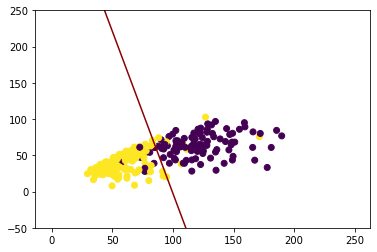

In [20]:
PrintPlot(x_test_A, y_test_A, w)

### Classificando 8 e 4

In [21]:
clf = LinearRegression()
# clf = LogisticRegression(tmax=50000)
# clf.fit(x_train_0x1, y_train_0x1, max_iter=200)
# clf.fit(x_train_0x1, y_train_0x1)
clf.fit(x_train_B, y_train_B)
predict_y = clf.predict(x_test_B)
print(clf.score(x_test_B, y_test_B))
w = clf.get_w()

W_.append(w)


0.728


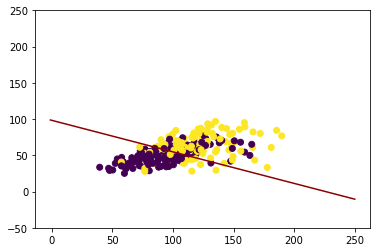

In [22]:
PrintPlot(x_test_B, y_test_B, w)


### Classificação de 1, 4 e 8

In [23]:
def predi_lr(x, w):
   return np.sign(np.dot(w, x))

def predi_PPLA(x, w):
    return np.sign(np.dot(w, x))

def predi_logisticr(x, w):
    return 1 if (1 / (1 + np.exp(-(w[0] + w[1:].T @ x)))) >= 0.5 else -1




def predict(x, y, w, model_type=0):
    """
    model_type = 0 - PocketPLA
    model_type = 1 - Regressão linear
    model_type = 2 - Regressão Logistica
    """

    x = list(map(lambda x: np.array([1, x[0], x[1]]), x))

    pred = 0
    predict_y = []

    if model_type == 0:
        pred = predi_PPLA
    elif model_type == 1:
        pred = predi_lr
    elif model_type == 2:
        pred = predi_logisticr

    for x_i, y_i in zip(x, y):
        
        if pred(x_i, w[0]) == 1:
            predict_y.append(1)
        else:
            if pred(x_i, w[1]) == 1:
                predict_y.append(8)
            else:
                predict_y.append(4)


    return predict_y


def score(X, Y):
    return accuracy_score(Y, predict(X))
    

        

    

In [24]:
import random

values3 = [1, 4, 8]

filtered_train_C = filter_label(train, values3)

N = len(filtered_train_C)
N_PONTOS_AMOSTRA = 5000
rn = random.randint(0, (N-1) - N_PONTOS_AMOSTRA)

filtered_train_C = filtered_train_C[rn: (rn+ N_PONTOS_AMOSTRA)]

x_train_C, y_train_C = generate_x_y(filtered_train_C, principal_label=principal, use_principal=False)

predict_y = predict(x_train_C, y_train_C, W_, model_type=0)


In [25]:
accuracy_score(y_train_C, predict_y)

0.623

In [ ]:
print(classification_report(y_train_C, predict_y))
print(confusion_matrix(y_train_C, predict_y))

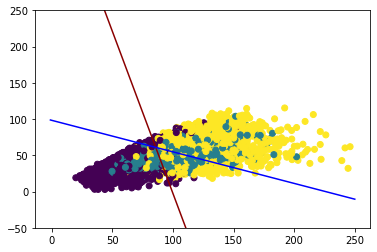

In [26]:
plt.scatter(x_train_C[:, 0], x_train_C[:, 1], c=list(y_train_C.ravel()))
x = np.linspace(-1, 250, 1000)


size = 250
plt.ylim(-50, size)

w1 = W_[0]
w2 = W_[1]


plt.plot(x, (-w1[0] - w1[1]*x) / w1[2], color='darkred')
plt.plot(x, (-w2[0] - w2[1]*x) / w2[2], color='blue')


# Um contra todos

Precisa ser finalizada ainda, mas estou gerando os w de cada modelo tbm

In [27]:
labels = [0, 1, 2, 3, 4, 5, 6, 7, 8 ]
directory = '../data/filtered_digit_dataset/'
X_tests = []
Y_tests = []
X_trains = []
Y_trains = []

for l in labels:

    
    filename_x_test = str(l) + '_x_test.txt'
    filename_y_test = str(l) + '_y_test.txt'

    filename_x_train = str(l) + '_x_train.txt'
    filename_y_train = str(l) + '_y_train.txt'
    x_test = np.loadtxt(directory + filename_x_test, dtype = float)
    y_test = np.loadtxt(directory + filename_y_test, dtype = int)

    x_train = np.loadtxt(directory + filename_x_train, dtype = float)
    y_train = np.loadtxt(directory + filename_y_train, dtype = int)

    X_tests.append(x_test)
    Y_tests.append(y_test)

    X_trains.append(x_train)
    Y_trains.append(y_train)





In [28]:

W = []


for l in labels:
    print('label = ', l)
    x_test = X_tests[l]
    y_test = Y_tests[l]

    x_train = X_trains[l]
    y_train = Y_trains[l]


    clf = LinearRegression()
    clf.fit(x_train, y_train)
    predict_y = clf.predict(x_test)
    w = clf.get_w()

    print(clf.score(x_test, y_test))

    W.append(w)



label =  0
0.895
label =  1
0.879
label =  2
0.859
label =  3
0.873
label =  4
0.826
label =  5
0.802
label =  6
0.748
label =  7
0.633
label =  8
0.661


In [29]:
# def predict(x_test, w):
#     predict_y = np.zeros(len(x_test))
#     for i in range(len(x_test)):
            
#         g = np.sign(w[0] + w[1]*x_test[i][0] + w[2]*x_test[i][1])
            
#         predict_y[i] = g

        
#     return predict_y




In [30]:
i = 0

x_test = X_tests[i]
y_test = Y_tests[i]
predict_y = predict(x_test, W[i])



print(classification_report(y_test, predict_y))
print(confusion_matrix(y_test, predict_y))

TypeError: predict() missing 1 required positional argument: 'w'

In [ ]:
def one_vs_rest(X_trains, Y_trains, W):
    pass

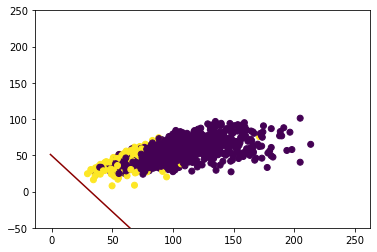

In [ ]:
l = 1
x_test = X_tests[l]
y_test = Y_tests[l]

x_train = X_trains[l]
y_train = Y_trains[l]

w = W[l]

plt.scatter(x_test[:, 0], x_test[:, 1], c=list(np.sign(y_test).ravel()) )
x = np.linspace(-1, 250, 1000)


size = 250
plt.ylim(-50, size)


plt.plot(x, (-w[0] - w[1]*x) / w[2], color='darkred')
# plt.plot(x, (-clf.intercept_-clf.coef_[0]*x)/clf.coef_[1], color='darkred')


In [ ]:
# clf = PocketPLA()
# clf.execute(x_train, y_train)
# w = clf.get_w()

# clf = PLA(x_train, y_train)
# clf


# clf2 = PocketPLA()
# clf2.fit(x_train, y_train)
# predict_y = clf.predict(x_test)
# w = clf.get_w()
# clf.score(x_test, y_test)

In [ ]:
clf2 = PocketPLA()
clf2.fit(x_train, y_train, max_iter=1000)

In [ ]:
clf2.score(x_test, y_test)


w1 = clf1.get_w()
print(w1)

w2 = clf2.get_w()
print(w2)

NameError: name 'clf1' is not defined

In [ ]:
predict_y = clf2.predict(x_test)



print(classification_report(y_test, predict_y))
print(confusion_matrix(y_test, predict_y))

In [ ]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=list(np.sign(y_test).ravel()) )
x = np.linspace(-25, 250, 100)


size = 250
plt.ylim(-50, size)

plt.plot(x, clf1.getOriginalY(x), color='darkred')
plt.plot(x, (-w2[0] - w2[1]*x) / w2[2], color='red')

# plt.plot(x, clf.h(x), color='darkred')

# plt.plot(x, (-clf.intercept_-clf.coef_[0]*x)/clf.coef_[1], color='darkred')
